In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [18]:

# Read the data
df = pd.read_csv('Data/colon-dataset-processed.csv')

df

,Class,Age,p16540_C/C,p16540_G/C,p16540_G/G,p16580_C/C,p16580_C/T,p16580_T/T,mdm2_G/G,mdm2_G/T,mdm2_T/T,GAL3_A/A,GAL3_C/A,GAL3_C/C,TIM1_C/C,TIM1_G/C,TIM1_G/G
0,healthy,49,False,True,False,True,False,False,True,False,False,False,True,False,False,True,False
1,healthy,49,False,True,False,True,False,False,True,False,False,True,False,False,False,True,False
2,healthy,49,False,True,False,True,False,False,False,True,False,False,True,False,True,False,False
3,healthy,36,False,True,False,True,False,False,False,False,True,False,True,False,True,False,False
4,healthy,49,True,False,False,False,True,False,False,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,diagnosed,81,False,True,False,True,False,False,False,False,True,False,False,True,False,False,True
111,diagnosed,73,True,False,False,True,False,False,False,False,True,False,False,True,False,False,True
112,diagnosed,56,True,False,False,True,False,False,False,True,False,False,False,True,False,True,False
113,diagnosed,74,False,True,False,False,True,False,True,False,False,False,False,True,False,False,True


In [19]:
y=df['Class']

X=df.drop(['Class'], axis=1)
print('Original dataset distribution %s' % Counter(y))

Original dataset distribution Counter({'diagnosed': 65, 'healthy': 50})


In [20]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

# Check distribution after SMOTE
print('Resampled dataset distribution %s' % Counter(y_res))

Resampled dataset distribution Counter({'diagnosed': 50, 'healthy': 50})


In [21]:
#random forest classifier

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=123)


clf = RandomForestClassifier(n_estimators=100, max_depth=10)

In [22]:
history = clf.fit(X_train, y_train)

In [23]:
#evaluate model
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   diagnosed       0.89      0.89      0.89         9
     healthy       0.91      0.91      0.91        11

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



In [24]:
#acurracy for model before hyperparameter tuning
model1_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (model1_accuracy * 100.0))

Accuracy: 90.00%


In [26]:
#save model
import pickle
with open('Models/RF_undersample.pkl', 'wb') as file:
    pickle.dump(clf, file)

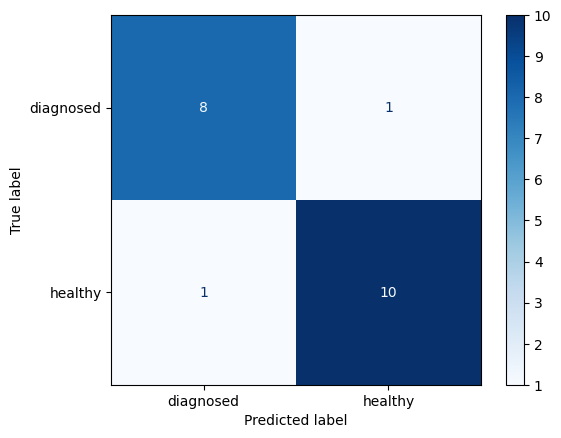

In [ ]:
# Plot the confusion matrix
cm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
importances = clf.feature_importances_

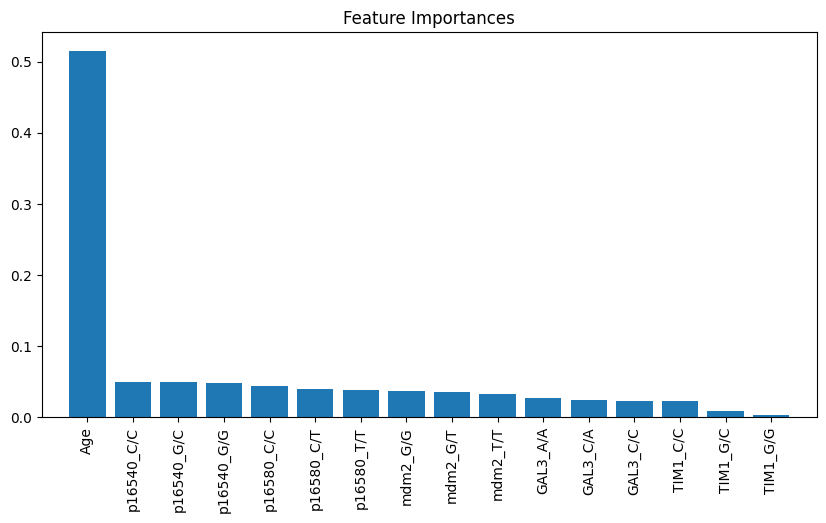

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get the feature names except the target variable
lables = df.columns[1:]

# Sort feature importances in descending order and get the indices
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), labels=lables, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


In [ ]:
# Define the parameter grid
from sklearn.model_selection import GridSearchCV, KFold



param_grid = {
    "n_estimators": [10, 20, 50, 100,200], 
    "max_depth": [3, 5, 10, 20, 50, 100],
    "max_features": [3, 5, 10, 20, 50, 100],
    "min_samples_split": [2, 5, 10, 20, 50, 100],
}

# Create the model
rf = RandomForestClassifier()

cv=KFold(n_splits=10, random_state=0, shuffle=True)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=cv, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

Fitting 10 folds for each of 1080 candidates, totalling 10800 fits
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=20; to

In [ ]:
#bulid model with best parameters
best_clf=grid_search.best_estimator_

In [ ]:
#evaluate model
y_pred2 = best_clf.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

   diagnosed       0.80      0.89      0.84         9
     healthy       0.90      0.82      0.86        11

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.86      0.85      0.85        20



In [ ]:
#accuracy
model2_accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy: %.2f%%" % (model2_accuracy * 100.0))

Accuracy: 85.00%
